In [1]:
import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import *
import requests
from bs4 import BeautifulSoup

/home/dcooper/anaconda3/envs/rockies/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Get 2025 game logs
data = team_game_logs(2024, 'COL')
data.tail()

/home/dcooper/rockies/pybaseball/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0]


,Gtm,Date,Home,Opp,Score: Rslt,Score: RS,Score: RA,Score: Inn,Batting Stats: PA,Batting Stats: AB,...,Batting Stats: SH,Batting Stats: SF,Batting Stats: ROE,Batting Stats: IBB,Batting Stats: BAbip,Batting Stats: LOB,Batting Stats: #,Opp Starter: Player,Opp Starter: T,Opp Starter: GmSc
157,158,2024-09-25,NaN,STL,L,2,5,9,33,31,...,0,0,0,0,.421,4,9,Erick Fedde,R,70
158,159,2024-09-26,NaN,STL,W,10,8,9,41,35,...,1,1,1,0,.481,7,10,Kyle Gibson,R,36
159,160,2024-09-27,NaN,LAD,L,4,11,9,41,36,...,0,0,1,0,.348,10,12,Ryan Brasier,R,48
160,161,2024-09-28,NaN,LAD,L,2,13,9,32,28,...,1,1,0,0,.278,3,11,Yoshinobu Yamamoto,R,57
161,162,2024-09-29,NaN,LAD,L,1,2,9,35,33,...,0,0,0,0,.250,7,10,Anthony Banda,L,53


In [51]:
def get_pitcher_FIPminus(last, first, season=2024):
    # Get player id
    if last == 'King' and first == 'Michael':
        playerid = 19853
    elif last == 'Knack' and first == 'Landon':
        playerid = 27487
    elif last == 'Lord' and first == 'Brad':
        playerid = 31972
    elif last == 'Jobe' and first == 'Jackson':
        playerid = 30203
    elif last == 'Montero' and first == 'Keider':
        playerid = 22630
    elif last == 'Leiter' and first == 'Jack':
        playerid = 30146
    elif last == 'Warren' and first == 'Will':
        playerid = 30182
    elif last == 'Horton' and first == 'Cade':
        playerid = 31872
    elif last == 'Boyd' and first == 'Matthew':
        playerid = 15440
    elif last == 'Alcantara' and first == 'Sandy':
        playerid = 18684
    elif last == 'Holmes' and first == 'Grant':
        playerid = 16944
    elif last == 'Parker' and first == 'Mitchell' and season == 2024:
        return 94.0
    elif last == 'Parker' and first == 'Mitchell':
        playerid = 27636
    # elif last == 'Dreyer' and first == 'Jack':
        playerid = 30249
    elif last == 'Patrick' and first == 'Chad':
        playerid = 30113
    elif last == 'Gordon' and first == 'Colton':
        playerid = 31312
    elif last == 'Cannon' and first == 'Jonathan':
        playerid = 31730
    elif last == 'Smith' and first == 'Shane':
        playerid = 31687
    elif last == 'Fitts' and first == 'Richard':
        playerid = 30160
    elif last == 'Burns' and first == 'Chase':
        playerid = 35333
    elif last == 'Martinez' and first == 'Nick':
        playerid = 30146
    elif last == 'McGreevy' and first == 'Michael':
        playerid = 29869
    elif last == 'Sugano' and first == 'Tomoyuki':
        playerid = 35321
    elif last == 'Skenes' and first == 'Paul':
        playerid = 33677
    elif last == 'Ohtani' and first == 'Shohei' and season == 2025:
        return 46.0
    elif last == 'Ashcraft' and first == 'Braxton':
        playerid = 23793
    elif last == 'Burrows' and first == 'Mike':
        playerid = 24728
    elif last == 'Farris' and first == 'Mitch':
        playerid = 33628
    elif last == 'Dana' and first == 'Caden':
        playerid = 31508
    elif last == 'Castillo' and first == 'Luis':
        playerid = 15689
    elif last == 'McDonald' and first == 'Trevor':
        playerid = 26448
    elif last == 'Rodríguez' and first == 'Yariel':
        playerid = 33838
    elif last == 'Muñoz' and first == 'Roddery':
        playerid = 25311
    elif last == 'Black' and first == 'Mason':
        playerid = 30171
    elif last == 'Herz' and first == 'DJ':
        playerid = 26389
    elif last == 'Arrighetti' and first == 'Spencer':
        playerid = 29921
    elif last == 'Thorpe' and first == 'Drew':
        playerid = 31967
    elif last == 'Myers' and first == 'Tobias':
        playerid = 22191
    elif last == 'Scott' and first == 'Christian':
        playerid = 30107
    elif last == 'Schwellenbach' and first == 'Spencer':
        playerid = 31846
    elif last == 'Bellozo' and first == 'Valente':
        playerid = 23899
    elif last == 'Morton' and first == 'Charlie':
        playerid = 4676
    elif last == 'Leiter' and first == 'Jack':
        playerid = 30146
    elif last == 'Leiter' and first == 'Jack':
        playerid = 30146
    else:
        playerid = playerid_lookup(last, first, ignore_accents=True)['key_fangraphs'][0]
        print(last, first, playerid)
    
    URL = 'https://www.fangraphs.com/players/{}-{}/{}/stats/pitching'
    session = requests.session()
    
    # Get request
    content = session.get(URL.format(last, first, playerid)).content
    soup = BeautifulSoup(content)
    
    # Get 'Advanced' Table
    tables = soup.find_all('table')
    for i, table in enumerate(tables):
        if table.get_text(strip=True)[:300].startswith('SeasonTeamLevelK/9K/9'):
            df = pd.read_html(io.StringIO(str(table)))[0]
            break
    
    # Get FIP-
    FIPminus = df.loc[df['Season'] == str(season)].loc[df['Level'] == 'MLB']['FIP-FIP- - FIP adjusted for park and league where 100 is average and lower is better'].to_numpy()[0]
    
    return FIPminus


data['Opp Starter: FIP-'] = np.zeros(data.shape[0])
for i, r in data.iterrows():
    
    opp_pitcher = r['Opp Starter: Player']
    first, last = opp_pitcher.split()
    print(r['Date'], last, first)
    data.loc[i, 'Opp Starter: FIP-'] = get_pitcher_FIPminus(last, first)

data['Opp Starter: FIP-']

2024-03-28 Gallen Zac
Gallen Zac 19291
2024-03-29 Kelly Merrill
Kelly Merrill 11156
2024-03-30 Henry Tommy
Henry Tommy 26285
2024-03-31 Pfaadt Brandon
Pfaadt Brandon 27782
2024-04-01 Imanaga Shota
Imanaga Shota 33829
2024-04-02 Assad Javier
Assad Javier 21741
2024-04-03 Little Luke
Little Luke 28036
2024-04-05 Littell Zack
Littell Zack 15823
2024-04-06 Alexander Tyler
Alexander Tyler 17735
2024-04-07 Pepiot Ryan
Pepiot Ryan 26221
2024-04-08 Gallen Zac
Gallen Zac 19291
2024-04-09 Kelly Merrill
Kelly Merrill 11156
2024-04-10 Henry Tommy
Henry Tommy 26285
2024-04-12 Gausman Kevin
Gausman Kevin 14107
2024-04-13 Rodríguez Yariel
2024-04-14 Berríos José
Berríos José 14168
2024-04-15 Nola Aaron
Nola Aaron 16149
2024-04-16 Suárez Ranger
Suárez Ranger 17277
2024-04-17 Sánchez Cristopher
Sánchez Cristopher 20778
2024-04-20 Castillo Luis
2024-04-21 (1) Kirby George
Kirby George 25436
2024-04-21 (2) Hancock Emerson
Hancock Emerson 27470
2024-04-22 Cease Dylan
Cease Dylan 18525
2024-04-23 King Mich

0       86.0
1      108.0
2      161.0
3       92.0
4       93.0
       ...  
157     93.0
158    111.0
159     79.0
160     63.0
161     88.0
Name: Opp Starter: FIP-, Length: 162, dtype: float64

In [52]:
FIPminus = data['Opp Starter: FIP-'].to_numpy()
FIPminus

array([ 86., 108., 161.,  92.,  93., 116., 101.,  97., 128.,  99.,  86.,
       108., 161.,  91., 105., 114.,  95.,  82.,  73., 100.,  83., 146.,
        77.,  83., 106., 116., 102.,  79., 116., 177., 115., 121.,  99.,
       106., 111., 111., 123.,  90.,  98., 112., 116.,  77.,  83., 139.,
       111., 111., 133., 107., 125.,  73.,  95.,  82., 118., 161., 146.,
       132.,  63.,  96., 118., 112., 113.,  79., 108., 111.,  93., 102.,
       136.,  89.,  83.,  99., 117., 114., 132., 165.,  96.,  91.,  94.,
       108.,  88., 103., 140., 111.,  63.,  66., 138., 116.,  96.,  73.,
        79.,  96., 118.,  93., 112.,  82.,  95., 114., 113., 111.,  76.,
       119.,  80., 101.,  99., 111.,  63., 119.,  94., 127., 100., 109.,
       116., 121., 106., 104., 116.,  91.,  81.,  84.,  83.,  92., 116.,
       114., 106.,  77.,  98.,  91.,  94., 108., 105., 119., 111., 115.,
       177., 144., 140., 104., 106.,  94.,  53., 112.,  74., 112.,  96.,
       102., 126.,  96.,  60., 116.,  98., 124., 10

In [53]:
100/FIPminus

array([1.1627907 , 0.92592593, 0.62111801, 1.08695652, 1.07526882,
       0.86206897, 0.99009901, 1.03092784, 0.78125   , 1.01010101,
       1.1627907 , 0.92592593, 0.62111801, 1.0989011 , 0.95238095,
       0.87719298, 1.05263158, 1.2195122 , 1.36986301, 1.        ,
       1.20481928, 0.68493151, 1.2987013 , 1.20481928, 0.94339623,
       0.86206897, 0.98039216, 1.26582278, 0.86206897, 0.56497175,
       0.86956522, 0.82644628, 1.01010101, 0.94339623, 0.9009009 ,
       0.9009009 , 0.81300813, 1.11111111, 1.02040816, 0.89285714,
       0.86206897, 1.2987013 , 1.20481928, 0.71942446, 0.9009009 ,
       0.9009009 , 0.7518797 , 0.93457944, 0.8       , 1.36986301,
       1.05263158, 1.2195122 , 0.84745763, 0.62111801, 0.68493151,
       0.75757576, 1.58730159, 1.04166667, 0.84745763, 0.89285714,
       0.88495575, 1.26582278, 0.92592593, 0.9009009 , 1.07526882,
       0.98039216, 0.73529412, 1.12359551, 1.20481928, 1.01010101,
       0.85470085, 0.87719298, 0.75757576, 0.60606061, 1.04166

In [61]:
# Weights
weights = 100 / FIPminus
weights_sum = weights.sum()

In [54]:
# Method to find games after home/away switch
away_inds = [[] for i in range(11)]
home_inds = [[] for i in range(11)]
home_count = 0
away_count = 0
last = None
for i, r in data.iterrows():
    loc = r['Home']
    if loc == '@':
        if last in ['Home', None]:
            away_count = 1
            home_count = 0
        else:
            away_count += 1
        away_inds[away_count-1].append(i)
        last = 'Away'
    else:
        if last in ['Away', None]:
            home_count = 1
            away_count = 0
        else:
            home_count += 1
        home_inds[home_count-1].append(i)
        last = 'Home'    

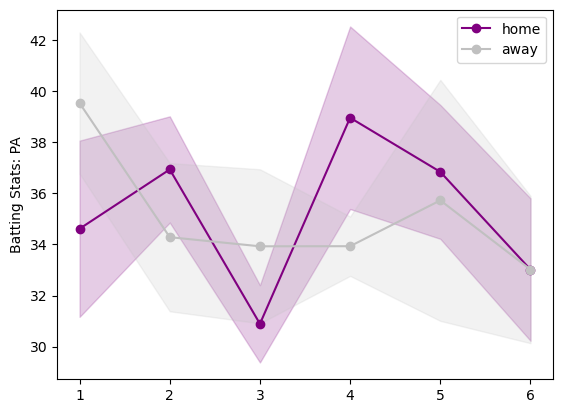

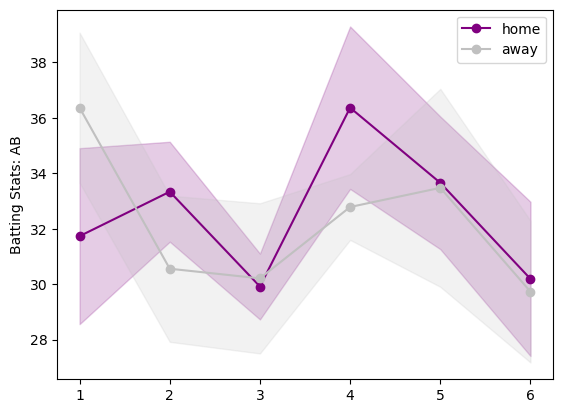

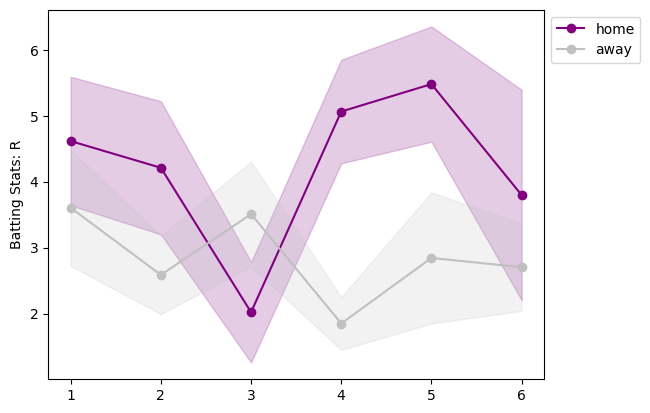

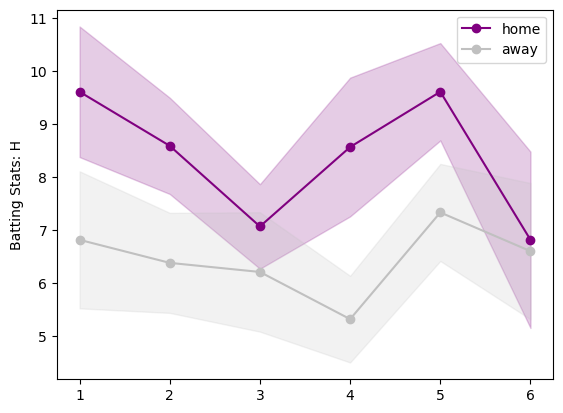

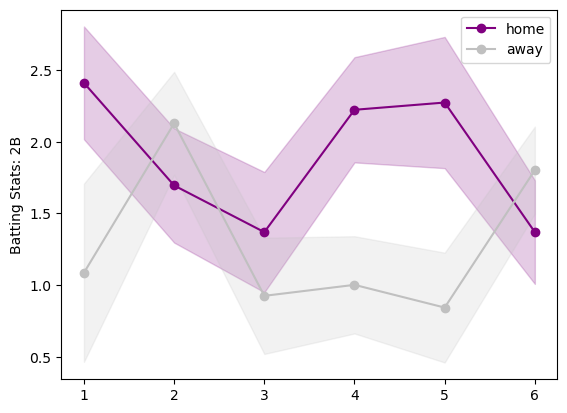

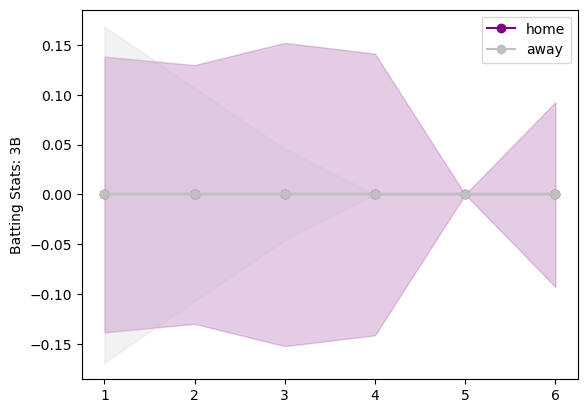

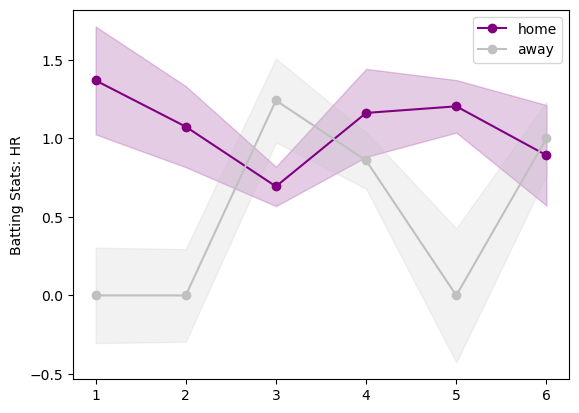

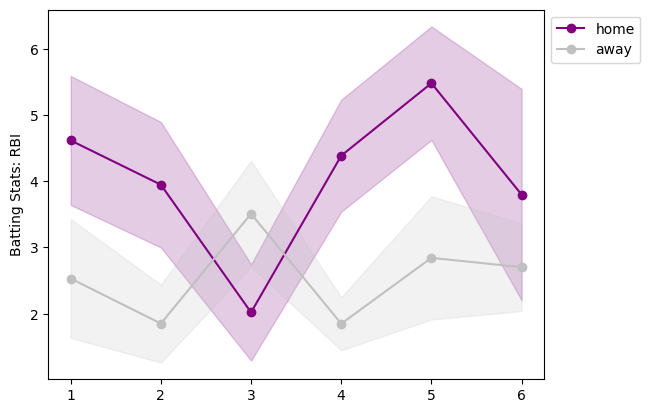

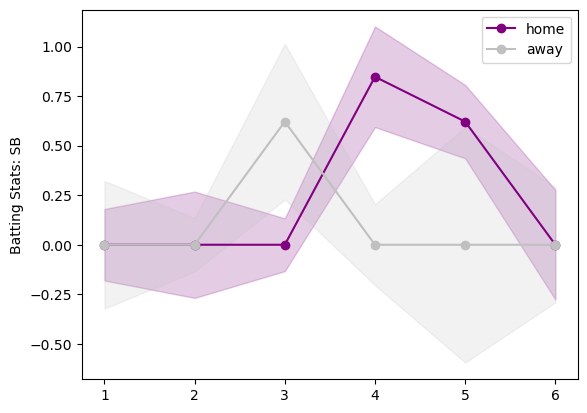

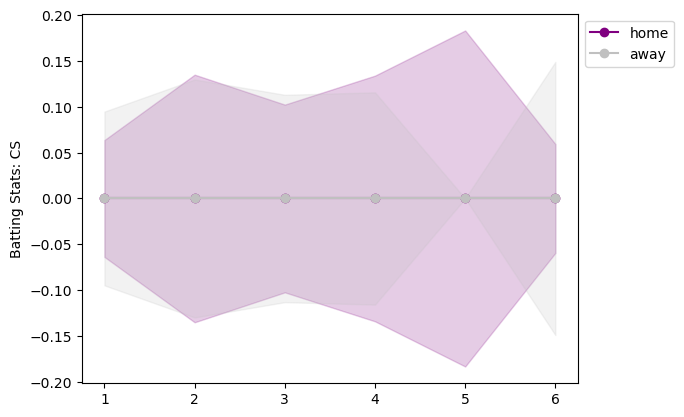

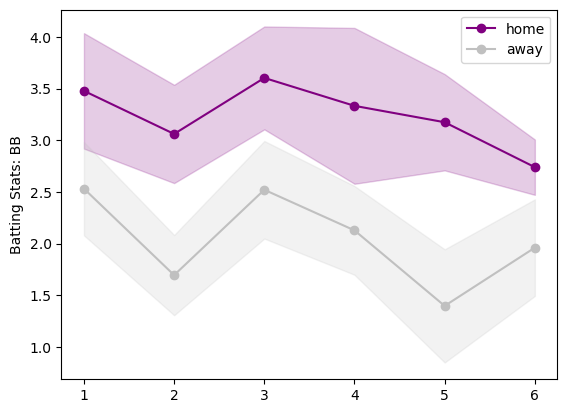

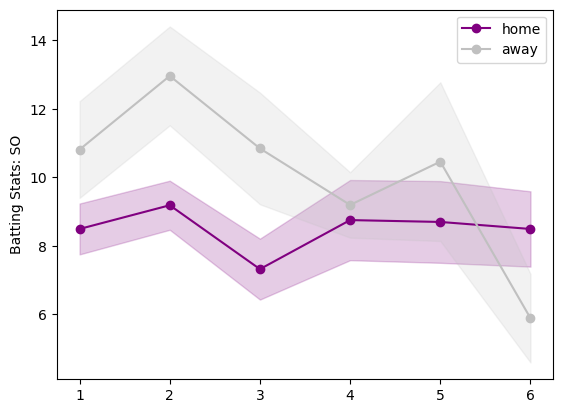

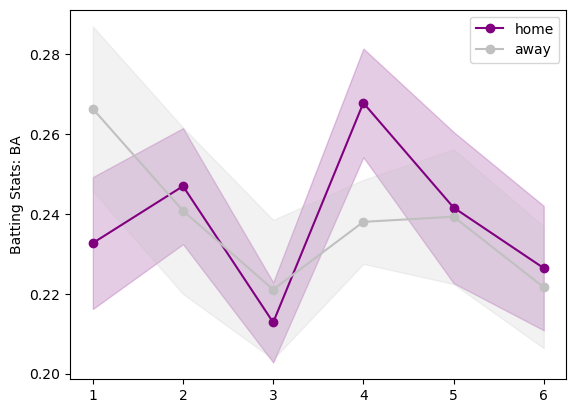

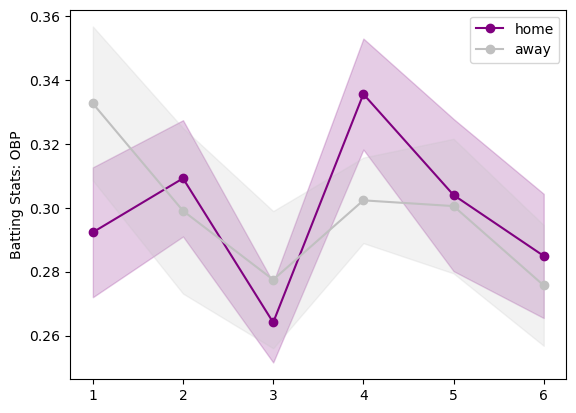

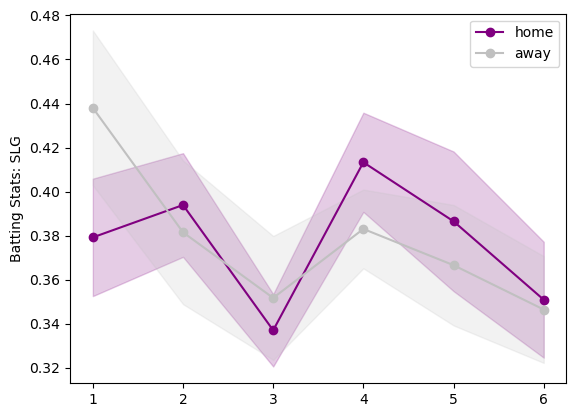

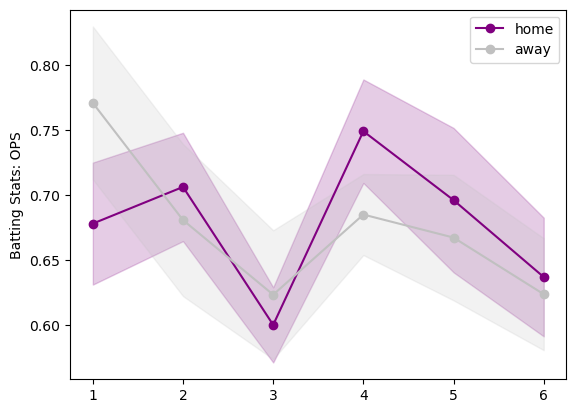

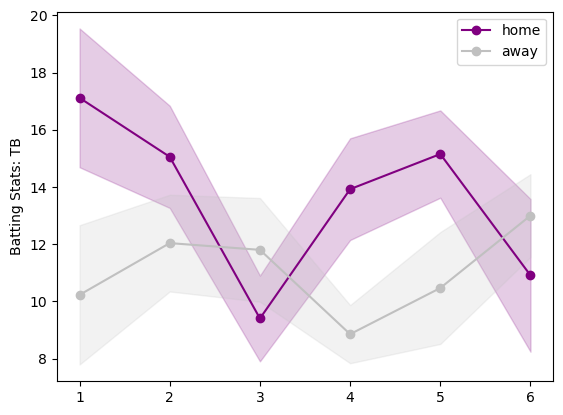

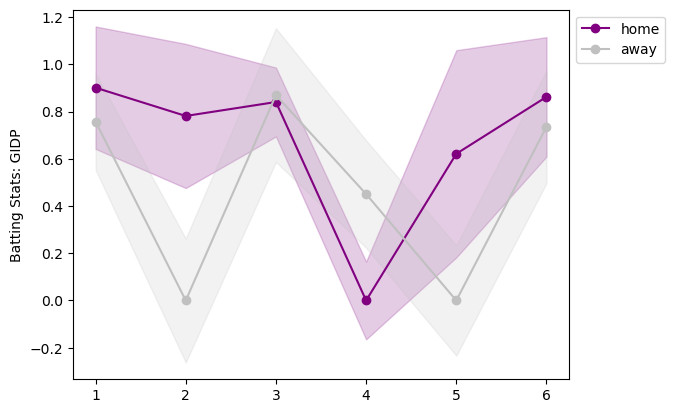

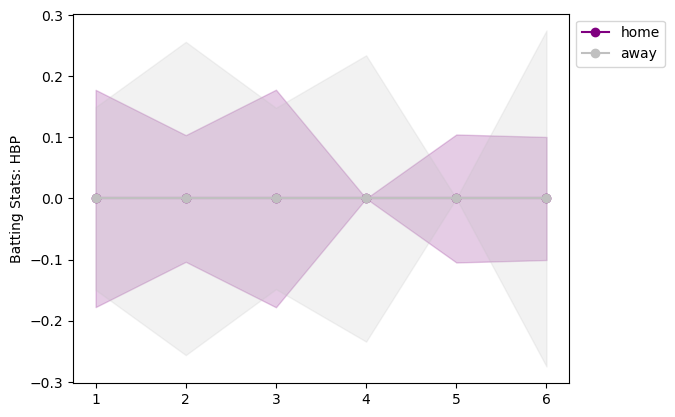

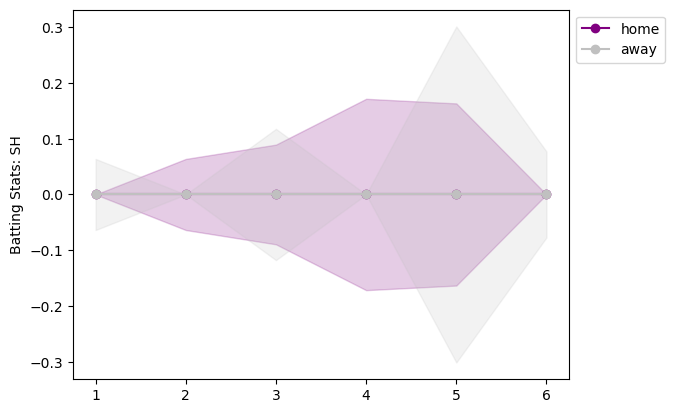

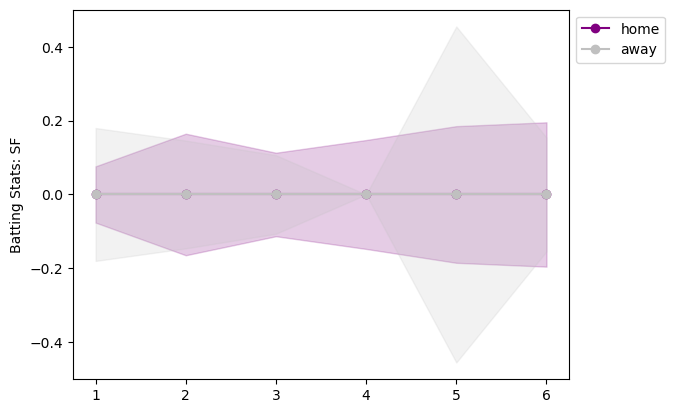

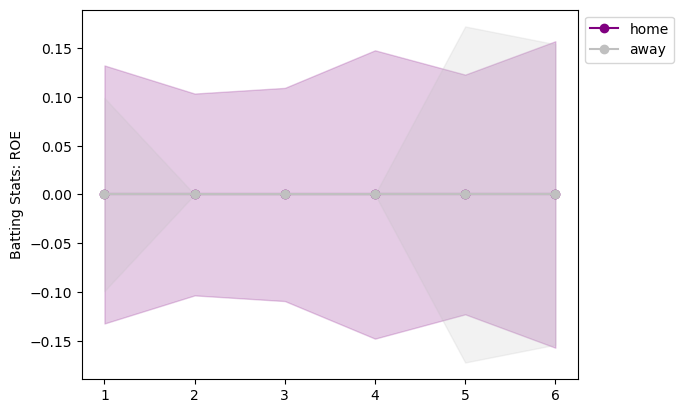

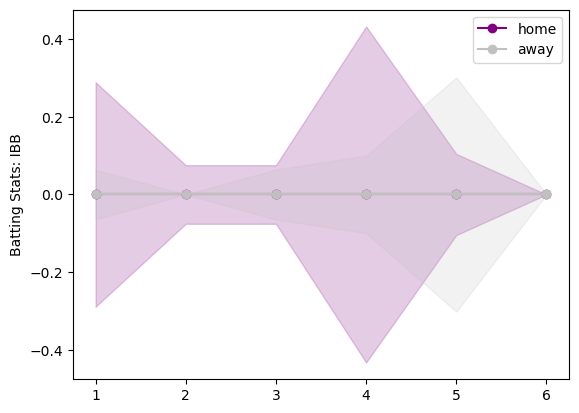

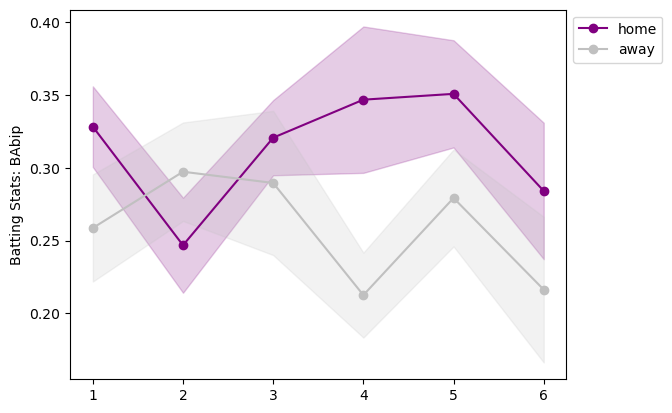

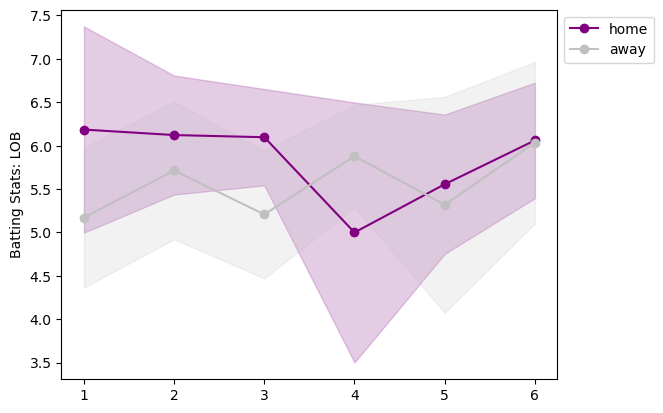

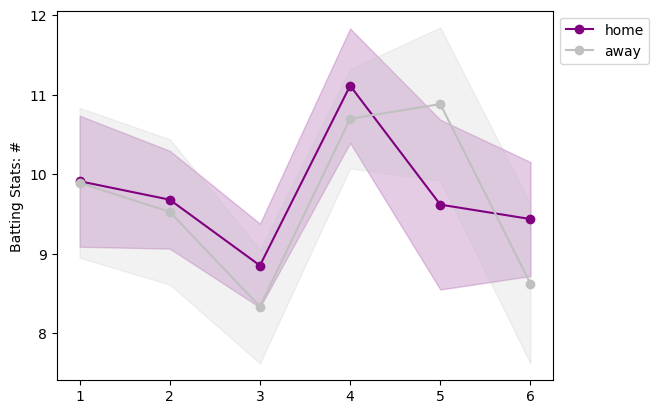

In [56]:
# Plot a stat
for col in data.columns:
    if col.startswith('Batting Stats'):
        stat = col
    else:
        continue
    home_stat = np.zeros(6)
    home_stat_err = np.zeros(6)
    away_stat = np.zeros(6)
    away_stat_err = np.zeros(6)
    away_stat[:] = np.nan
    home_stat[:] = np.nan
    away_stat_err[:] = np.nan
    home_stat_err[:] = np.nan 
    for i, (home_inds_i, away_inds_i) in enumerate(zip(home_inds[:6], away_inds[:6])):
        away_data = data.iloc[away_inds_i][stat].to_numpy().astype(float)
        away_data = np.array(away_data * weights[away_inds_i]) # Weight
        away_stat[i] = np.median(away_data)
        away_stat_err[i] = away_data.std() / np.sqrt(away_data.shape[0])
    
        home_data = data.iloc[home_inds_i][stat].to_numpy().astype(float)
        home_data = np.array(home_data * weights[home_inds_i]) # Weight
        home_stat[i] = np.median(home_data)
        home_stat_err[i] = home_data.std() / np.sqrt(home_data.shape[0])
    
    
    plt.plot(np.arange(1, 7), home_stat, label='home', marker='o', color='purple')
    plt.fill_between(np.arange(1, 7), home_stat - home_stat_err, home_stat + home_stat_err, color='purple', alpha=0.2)
    plt.plot(np.arange(1, 7), away_stat, label='away', marker='o', color='silver')
    plt.fill_between(np.arange(1, 7), away_stat - away_stat_err, away_stat + away_stat_err, color='silver', alpha=0.2)

        
    plt.ylabel(stat)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()



In [57]:
for col in data.columns:
    print(col)

Gtm
Date
Home
Opp
Score: Rslt
Score: RS
Score: RA
Score: Inn
Batting Stats: PA
Batting Stats: AB
Batting Stats: R
Batting Stats: H
Batting Stats: 2B
Batting Stats: 3B
Batting Stats: HR
Batting Stats: RBI
Batting Stats: SB
Batting Stats: CS
Batting Stats: BB
Batting Stats: SO
Batting Stats: BA
Batting Stats: OBP
Batting Stats: SLG
Batting Stats: OPS
Batting Stats: TB
Batting Stats: GIDP
Batting Stats: HBP
Batting Stats: SH
Batting Stats: SF
Batting Stats: ROE
Batting Stats: IBB
Batting Stats: BAbip
Batting Stats: LOB
Batting Stats: #
Opp Starter: Player
Opp Starter: T
Opp Starter: GmSc
Opp Starter: FIP-


In [58]:
# Methods
def get_stat(data, inds, stat, weights=None):
    if weights is None:
        return data.iloc[inds][f'Batting Stats: {stat}'].to_numpy().astype(float).sum()
    else:
        return np.dot(data.iloc[inds][f'Batting Stats: {stat}'].to_numpy().astype(float), weights)


def get_BA(hits, AB):
    return (hits / AB).round(3)

def get_OBP(H, BB, HBP, AB, SF):
    return ((H + BB + HBP) / (AB + BB + HBP + SF)).round(3)

def get_SLG(singles, doubles, triples, home_runs, AB):
    return ((singles + 2*doubles + 3*triples + 4*home_runs) / AB).round(3)

def get_ISO(SLG, BA):
    return (SLG - BA).round(3)

def get_OPS(OBP, SLG):
    return (OBP + SLG).round(3)

def get_wOBA(single, double, triple, home_run, BB, IBB, HBP, AB, SF=0):
    return ((0.691*(BB-IBB) + 0.722*HBP + 0.882*single + 1.252*double + 1.584*triple + 2.037*home_run) / (AB + BB - IBB + SF + HBP)).round(3)

def get_wRAA(wOBA, PA=502, lgwOBA=0.314, wOBA_scale=1.232):
    return (PA * ((wOBA - lgwOBA) / wOBA_scale)).round(1)

def get_day_splits(inds, weights=None):

    # Handle weights
    if weights is None:
        weights = np.repeat(1, 162)
    
    # Iterate through home/away switches
    Runs = np.zeros(6)
    BAs = np.zeros(6)
    OBPs = np.zeros(6)
    SLGs = np.zeros(6)
    ISOs = np.zeros(6)
    OPSs = np.zeros(6)
    wOBAs = np.zeros(6)
    wRAAs = np.zeros(6)
    SOs = np.zeros(6)
    BBs = np.zeros(6)
    for i, (inds_i) in enumerate(zip(inds[:6])):
    
        # Get outcome sums
        PA = get_stat(data, inds_i, 'PA')
        AB = get_stat(data, inds_i, 'AB')
        H = get_stat(data, inds_i, 'H', weights[inds_i])
        doubles = get_stat(data, inds_i, '2B', weights[inds_i])
        triples = get_stat(data, inds_i, '3B', weights[inds_i])
        home_runs = get_stat(data, inds_i, 'HR', weights[inds_i])
        singles = H - doubles - triples - home_runs
        BB = get_stat(data, inds_i, 'BB', weights[inds_i])
        HBP = get_stat(data, inds_i, 'HBP', weights[inds_i])
        IBB = get_stat(data, inds_i, 'IBB', weights[inds_i])
        SF = get_stat(data, inds_i, 'SF', weights[inds_i])
        Runs[i] = get_stat(data, inds_i, 'R', weights[inds_i]) / len(inds_i[0])
        SO = get_stat(data, inds_i, 'SO', weights[inds_i])
    
        # Get stats
        BAs[i] = get_BA(H, AB)
        OBPs[i] = get_OBP(H, BB, HBP, AB, SF)
        SLGs[i] = get_SLG(singles, doubles, triples, home_runs, AB)
        ISOs[i] = get_ISO(SLGs[i], BAs[i])
        OPSs[i] = get_OPS(OBPs[i], SLGs[i])
        wOBAs[i] = get_wOBA(singles, doubles, triples, home_runs, BB, IBB, HBP, AB, SF)
        wRAAs[i] = get_wRAA(wOBAs[i], PA=PA)
        SOs[i] = SO / PA
        BBs[i] = BB / PA


    return Runs, BAs, OBPs, SLGs, ISOs, OPSs, wOBAs, wRAAs, SOs, BBs




In [64]:
home_splits = get_day_splits(home_inds, weights=weights)
away_splits = get_day_splits(away_inds, weights=weights)
# home_splits = get_day_splits(home_inds)
# away_splits = get_day_splits(away_inds)

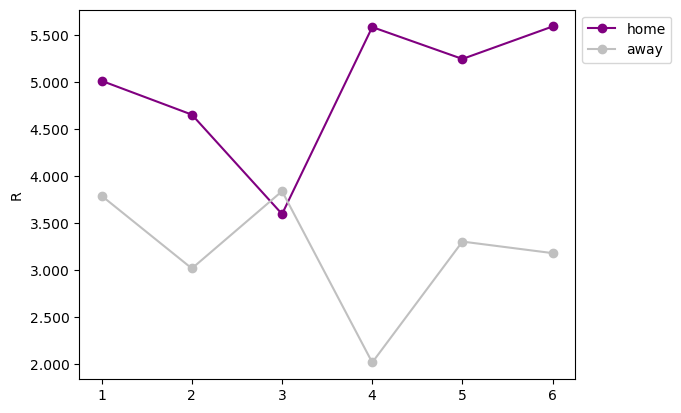

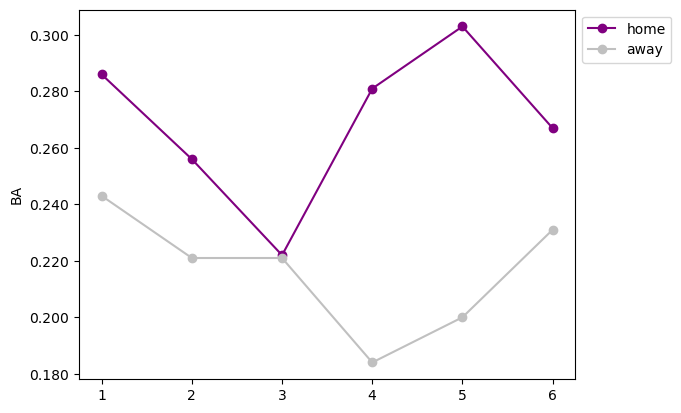

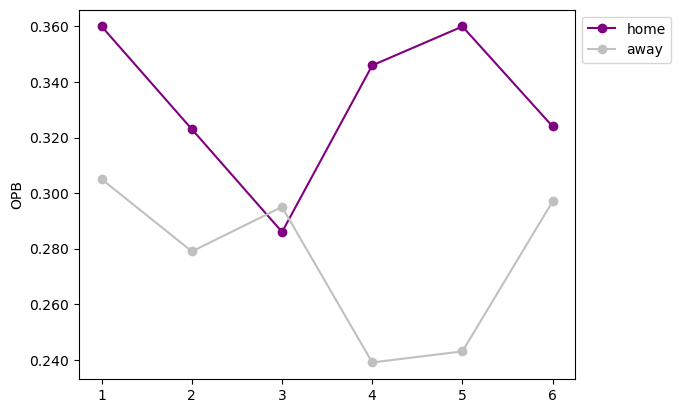

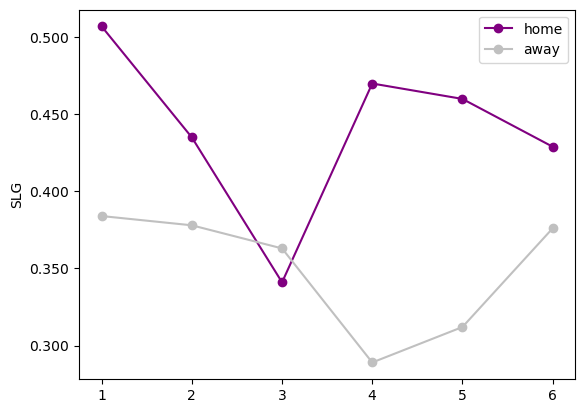

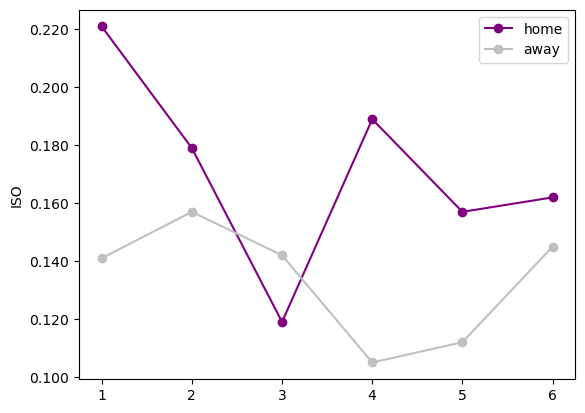

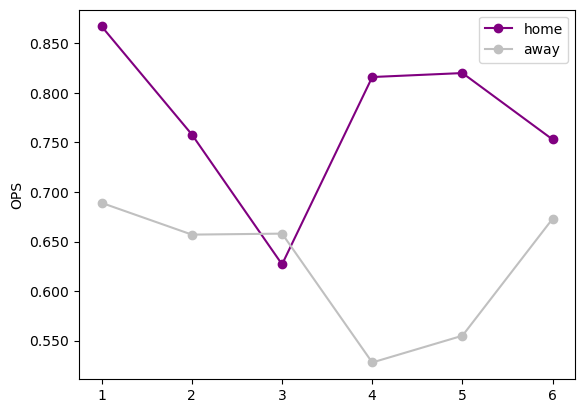

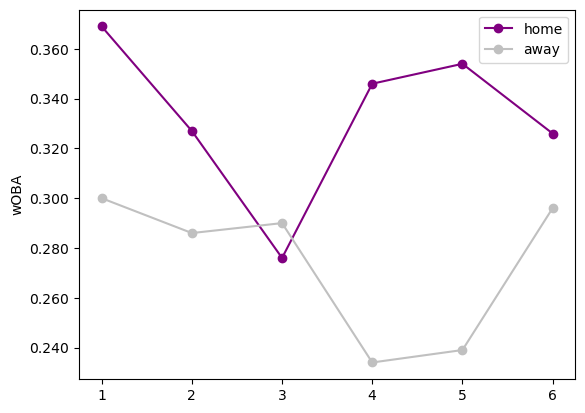

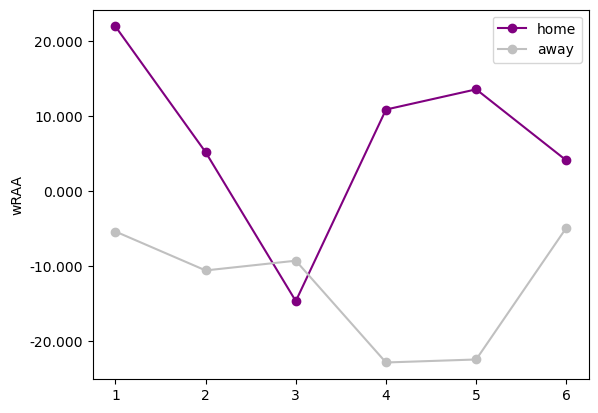

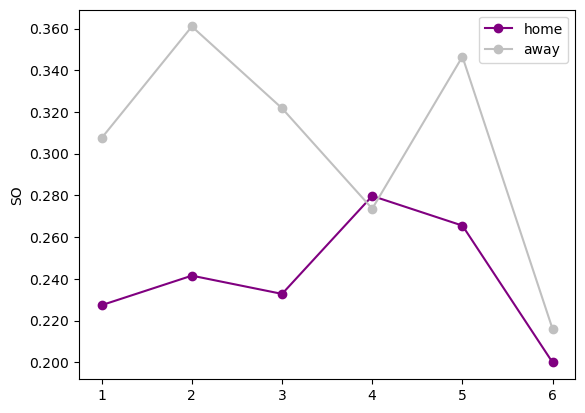

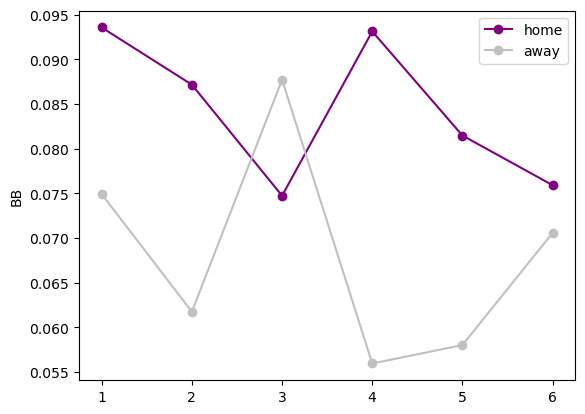

In [65]:
from matplotlib.ticker import FormatStrFormatter

stat_names = ['R', 'BA', 'OPB', 'SLG', 'ISO', 'OPS', 'wOBA', 'wRAA', 'SO', 'BB']
for home_stat, away_stat, stat in zip(home_splits, away_splits, stat_names):

    fig, ax = plt.subplots()
    ax.plot(np.arange(1, 7), home_stat, label='home', marker='o', color='purple')
    # plt.fill_between(np.arange(1, 7), home_stat - home_stat_err, home_stat + home_stat_err, color='purple', alpha=0.2)
    ax.plot(np.arange(1, 7), away_stat, label='away', marker='o', color='silver')
    # plt.fill_between(np.arange(1, 7), away_stat - away_stat_err, away_stat + away_stat_err, color='silver', alpha=0.2)

        
    ax.set_ylabel(stat)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()